# Bible Names
## Complex Network Analysis 
### 2020 UB - Master's Degree in Data Science

- Christopher Fady
- Xavier López


# Bible Names Network Analysis

This undirected network contains nouns (places and names) of the King James Version of the Bible and information about their co-occurrences.

A node represents one of the above noun types and an edge indicates that two nouns appeared together in the same Bible verse. The edge multiplicity denotes how often two nouns occured together.

http://konect.uni-koblenz.de/networks/moreno_names

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg
import numpy as np
import itertools
import random

## Dataset Overview

- The network is **undirected** and **weighted**.

- The weight is the umber of *word co-ocurrences* 

In [2]:
edges = pd.read_csv("data/data.csv",header = None)
edges.columns = ["name1", "name2", "weight"]
edges.head(10)

name1      name2  weight
0     israel      judah     100
1  jerusalem      judah      78
2      david     israel      73
3      david       saul      67
4     israel      moses      67
5      aaron      moses      66
6     israel  jerusalem      54
7     christ      jesus      52
8      egypt     israel      40
9    abraham      isaac      34

73% of the edges have weight = 1 

In [3]:
edges[edges["weight"]==1].shape[0]/edges.shape[0]

0.7262074252546271

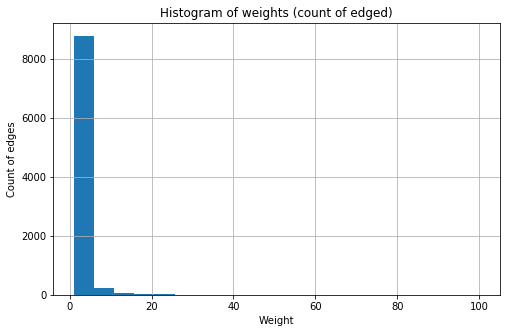

In [4]:
plt.figure(figsize=[8, 5])
hist = edges["weight"].hist(bins=20)
plt.title('Histogram of weights (count of edged)')
plt.xlabel('Weight')
plt.ylabel('Count of edges')
plt.show()

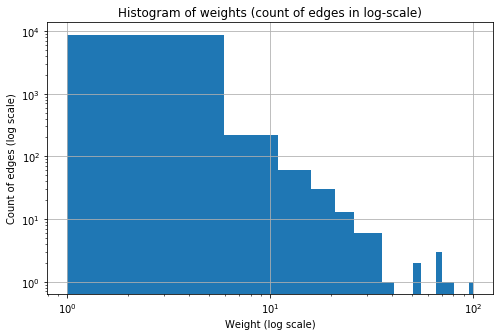

In [5]:
plt.figure(figsize=[8, 5])
hist = edges["weight"].hist(bins=20)
plt.title('Histogram of weights (count of edges in log-scale)')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Weight (log scale)')
plt.ylabel('Count of edges (log scale)')
plt.show()

Since in the log-log histogram can be fit by a line, it is reasonable to say that the weight distribution follows a Power Law.

## Cut Threshold

To avoid losing a lot of data the threshold is set to zero.

In [6]:
th = 0
edges = edges[edges.weight>th]

## Location as an attribute

Our nodes can refer to locations or names, to distinguish we created an atribute from external data that categorizes if a node is a location.



In [7]:
df_labs =  pd.read_excel("data/labels.xlsx", sheet_name="Sheet2")
locations = df_labs[df_labs["Location"] == 1]["Node"]
locations = [str(x).replace("'", "").replace(" ", "") for x in locations]

df_labs.head(10)

Node  Location
0     israel      True
1      judah     False
2  jerusalem      True
3      david     False
4       saul     False
5      moses     False
6      aaron     False
7     christ     False
8      jesus     False
9      egypt      True

In [8]:
G = nx.from_pandas_edgelist(edges, *edges.columns)
print(G.edges(data = True))

[('israel', 'judah', {'weight': 100}), ('israel', 'david', {'weight': 73}), ('israel', 'moses', {'weight': 67}), ('israel', 'jerusalem', {'weight': 54}), ('israel', 'egypt', {'weight': 40}), ('israel', 'jeroboam', {'weight': 33}), ('israel', 'saul', {'weight': 31}), ('israel', 'aaron', {'weight': 31}), ('israel', 'philistines', {'weight': 27}), ('israel', 'sin', {'weight': 26}), ('israel', 'joshua', {'weight': 25}), ('israel', 'solomon', {'weight': 22}), ('israel', 'samaria', {'weight': 21}), ('israel', 'jordan', {'weight': 21}), ('israel', 'benjamin', {'weight': 21}), ('israel', 'jacob', {'weight': 19}), ('israel', 'moab', {'weight': 17}), ('israel', 'ammon', {'weight': 17}), ('israel', 'ephraim', {'weight': 17}), ('israel', 'pharaoh', {'weight': 16}), ('israel', 'eleazar', {'weight': 16}), ('israel', 'ahab', {'weight': 16}), ('israel', 'assyria', {'weight': 15}), ('israel', 'samuel', {'weight': 15}), ('israel', 'jehoshaphat', {'weight': 15}), ('israel', 'reuben', {'weight': 14}), ('i

In [9]:
node_dict = dict(G.nodes(data = "location", default = False))

for l in locations:
    node_dict[l] = True
    
node_dict

{'israel': True,
 'judah': False,
 'jerusalem': True,
 'david': False,
 'saul': False,
 'moses': False,
 'aaron': False,
 'christ': False,
 'jesus': False,
 'egypt': True,
 'abraham': False,
 'isaac': False,
 'jacob': False,
 'jeroboam': False,
 'babylon': True,
 'pharaoh': True,
 'philistines': True,
 'sin': True,
 'benjamin': False,
 'jonathan': False,
 'joshua': False,
 'solomon': False,
 'samaria': True,
 'jordan': False,
 'joab': False,
 'peter': False,
 'ephraim': False,
 'abner': False,
 'manasseh': False,
 'nebat': False,
 'eleazar': False,
 'jehoshaphat': False,
 'simon': False,
 'joseph': False,
 'gilead': False,
 'zedekiah': False,
 'moab': False,
 'ammon': True,
 'gad': False,
 'reuben': False,
 'asa': False,
 'hebron': False,
 'amaziah': False,
 'james': False,
 'john': False,
 'hezekiah': False,
 'paul': False,
 'ahab': False,
 'heshbon': True,
 'sihon': False,
 'zeruiah': False,
 'bashan': True,
 'og': False,
 'assyria': True,
 'samuel': False,
 'nun': False,
 'esau': Fa

In [10]:
nx.set_node_attributes(G, node_dict, "location")

In [11]:
G.nodes(data = True)

NodeDataView({'israel': {'location': True}, 'judah': {'location': False}, 'jerusalem': {'location': True}, 'david': {'location': False}, 'saul': {'location': False}, 'moses': {'location': False}, 'aaron': {'location': False}, 'christ': {'location': False}, 'jesus': {'location': False}, 'egypt': {'location': True}, 'abraham': {'location': False}, 'isaac': {'location': False}, 'jacob': {'location': False}, 'jeroboam': {'location': False}, 'babylon': {'location': True}, 'pharaoh': {'location': True}, 'philistines': {'location': True}, 'sin': {'location': True}, 'benjamin': {'location': False}, 'jonathan': {'location': False}, 'joshua': {'location': False}, 'solomon': {'location': False}, 'samaria': {'location': True}, 'jordan': {'location': False}, 'joab': {'location': False}, 'peter': {'location': False}, 'ephraim': {'location': False}, 'abner': {'location': False}, 'manasseh': {'location': False}, 'nebat': {'location': False}, 'eleazar': {'location': False}, 'jehoshaphat': {'location': 

In [12]:
G.edges(data = True)

EdgeDataView([('israel', 'judah', {'weight': 100}), ('israel', 'david', {'weight': 73}), ('israel', 'moses', {'weight': 67}), ('israel', 'jerusalem', {'weight': 54}), ('israel', 'egypt', {'weight': 40}), ('israel', 'jeroboam', {'weight': 33}), ('israel', 'saul', {'weight': 31}), ('israel', 'aaron', {'weight': 31}), ('israel', 'philistines', {'weight': 27}), ('israel', 'sin', {'weight': 26}), ('israel', 'joshua', {'weight': 25}), ('israel', 'solomon', {'weight': 22}), ('israel', 'samaria', {'weight': 21}), ('israel', 'jordan', {'weight': 21}), ('israel', 'benjamin', {'weight': 21}), ('israel', 'jacob', {'weight': 19}), ('israel', 'moab', {'weight': 17}), ('israel', 'ammon', {'weight': 17}), ('israel', 'ephraim', {'weight': 17}), ('israel', 'pharaoh', {'weight': 16}), ('israel', 'eleazar', {'weight': 16}), ('israel', 'ahab', {'weight': 16}), ('israel', 'assyria', {'weight': 15}), ('israel', 'samuel', {'weight': 15}), ('israel', 'jehoshaphat', {'weight': 15}), ('israel', 'reuben', {'weigh

## Visualization of the Network

In [13]:
colors = ["blue" if n[1]["location"] else "red" for n in G.nodes(data = True)]


### Visualization of the hole network

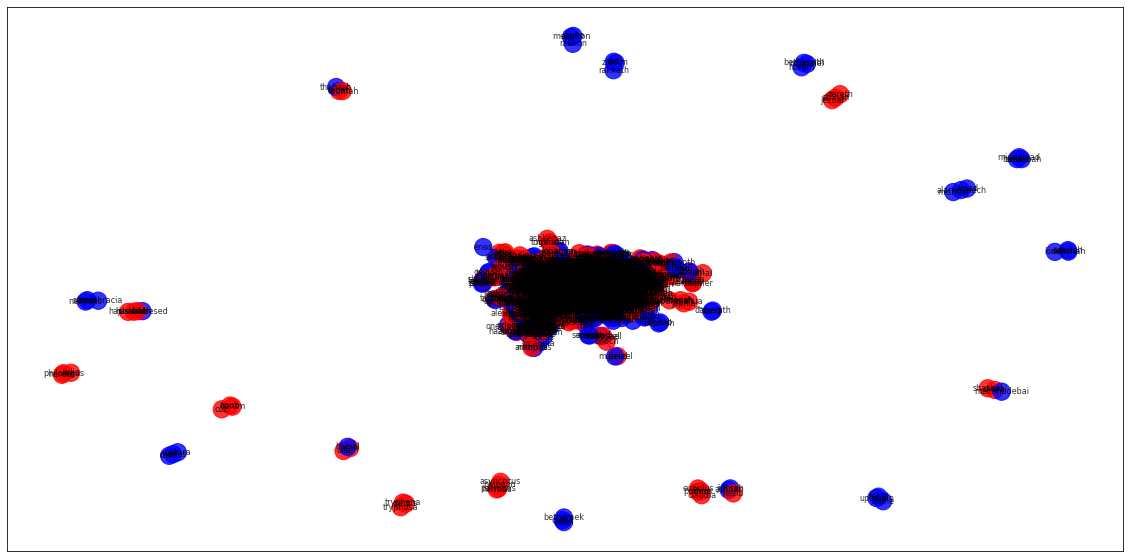

In [14]:
plt.figure(figsize=(20, 10))

nx.draw_networkx(G,node_color = colors, width = 0.5, alpha = 0.8,font_size = 8)
plt.draw()

### Visualization of the main connected component

In [15]:
#get the max. connected component (the component with more nodes)
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        

In [16]:
Gc = max(connected_component_subgraphs(G), key=len)
colors = ["blue" if n[1]["location"] else "red" for n in Gc.nodes(data = True)]
pos = nx.spring_layout(Gc)

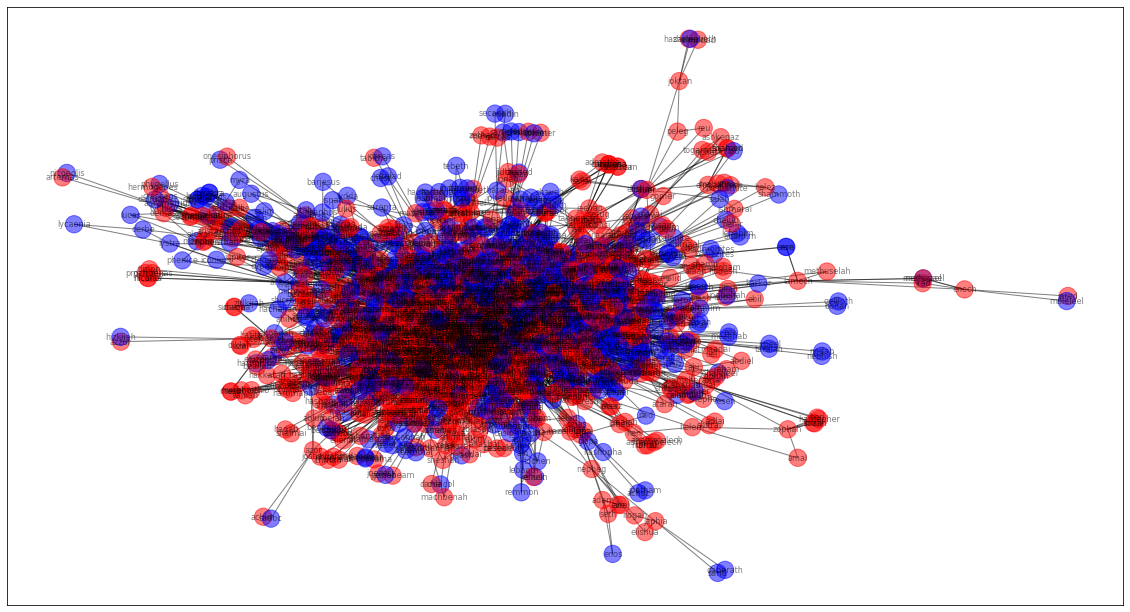

In [17]:
plt.figure(figsize=(20, 11))
nx.draw_networkx(Gc,pos = pos, node_color = colors, alpha = 0.5,font_size = 8)
plt.draw()

### Visualization of t he main connected component filtered by location

In [18]:
Gcloc = Gc.subgraph(locations)
Gcloc

In [19]:
Gcloc = max(connected_component_subgraphs(Gcloc), key=len)
colors = ["blue" if n[1]["location"] else "red" for n in Gcloc.nodes(data = True)]


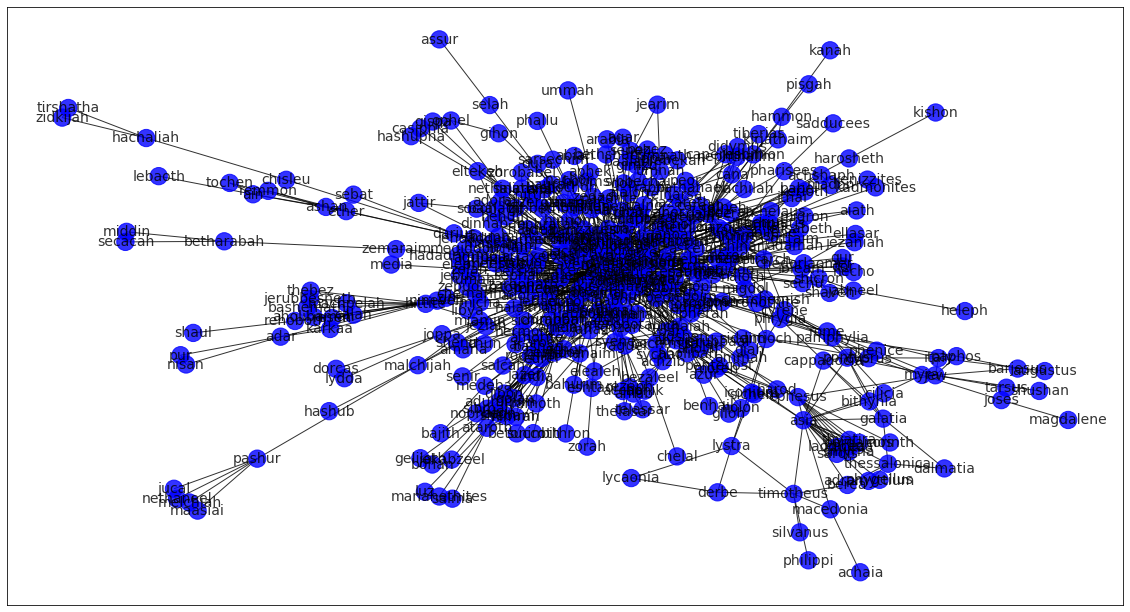

In [20]:
plt.figure(figsize=(20, 11))
nx.draw_networkx(Gcloc, alpha = 0.8,font_size = 14, node_color = colors)
plt.draw()

### Visualization of the main connected component filtered by not locations (names)

In [21]:
non_locations = [x for x in list(Gc.nodes) if x not in locations]
non_locations

['judah',
 'david',
 'saul',
 'moses',
 'aaron',
 'christ',
 'jesus',
 'abraham',
 'isaac',
 'jacob',
 'jeroboam',
 'benjamin',
 'jonathan',
 'joshua',
 'solomon',
 'jordan',
 'joab',
 'peter',
 'ephraim',
 'abner',
 'manasseh',
 'nebat',
 'eleazar',
 'jehoshaphat',
 'simon',
 'joseph',
 'gilead',
 'zedekiah',
 'moab',
 'gad',
 'reuben',
 'asa',
 'hebron',
 'amaziah',
 'james',
 'john',
 'hezekiah',
 'paul',
 'ahab',
 'sihon',
 'zeruiah',
 'og',
 'samuel',
 'nun',
 'esau',
 'jesse',
 'joash',
 'jehoiakim',
 'ithamar',
 'benaiah',
 'jehoiada',
 'ahaziah',
 'abishai',
 'jericho',
 'jeremiah',
 'abednego',
 'meshach',
 'ahikam',
 'gedaliah',
 'phinehas',
 'dan',
 'leah',
 'ishmael',
 'machir',
 'abihu',
 'nadab',
 'josiah',
 'absalom',
 'nethaniah',
 'rehoboam',
 'rachel',
 'nebuchadnezzar',
 'ner',
 'sarah',
 'shadrach',
 'zion',
 'baasha',
 'amoz',
 'isaiah',
 'balaam',
 'balak',
 'asahel',
 'sennacherib',
 'joram',
 'johanan',
 'kareah',
 'azariah',
 'canaan',
 'edom',
 'abigail',
 'za

In [22]:
Gc_noloc = Gc.subgraph(non_locations)
colors = ["blue" if n[1]["location"] else "red" for n in Gc_noloc.nodes(data = True)]


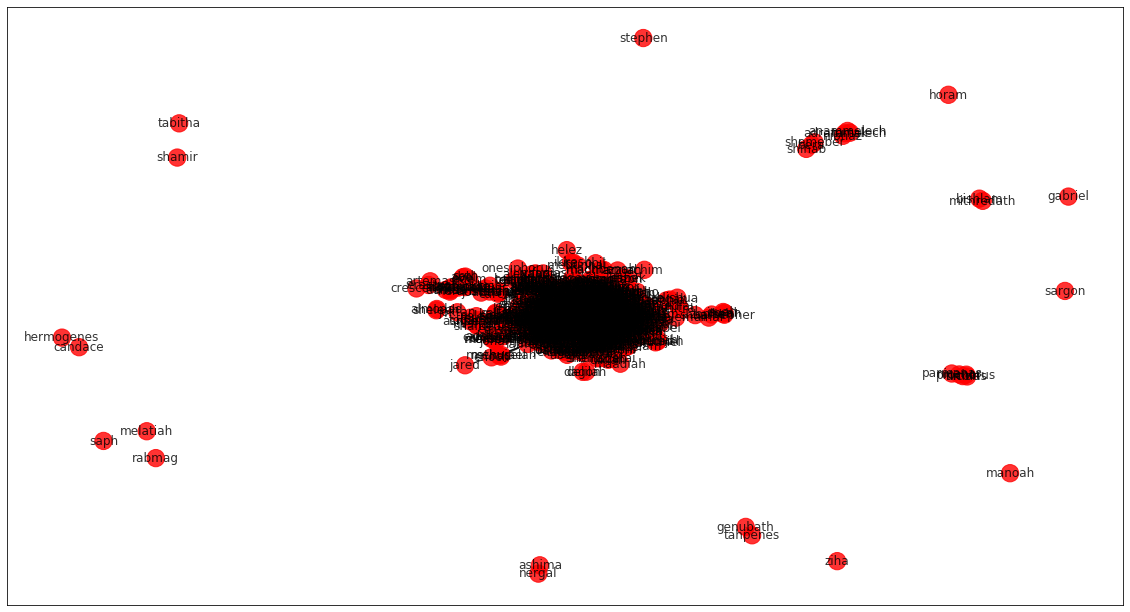

In [23]:
plt.figure(figsize=(20, 11))
nx.draw_networkx(Gc_noloc, alpha = 0.8,font_size = 12, node_color = colors)
plt.draw()

### Visualization of the main connected component of the network filtered by names


In [24]:
Gc_noloc_cc = max(connected_component_subgraphs(Gc_noloc), key=len)
colors = ["blue" if n[1]["location"] else "red" for n in Gc_noloc_cc.nodes(data = True)]

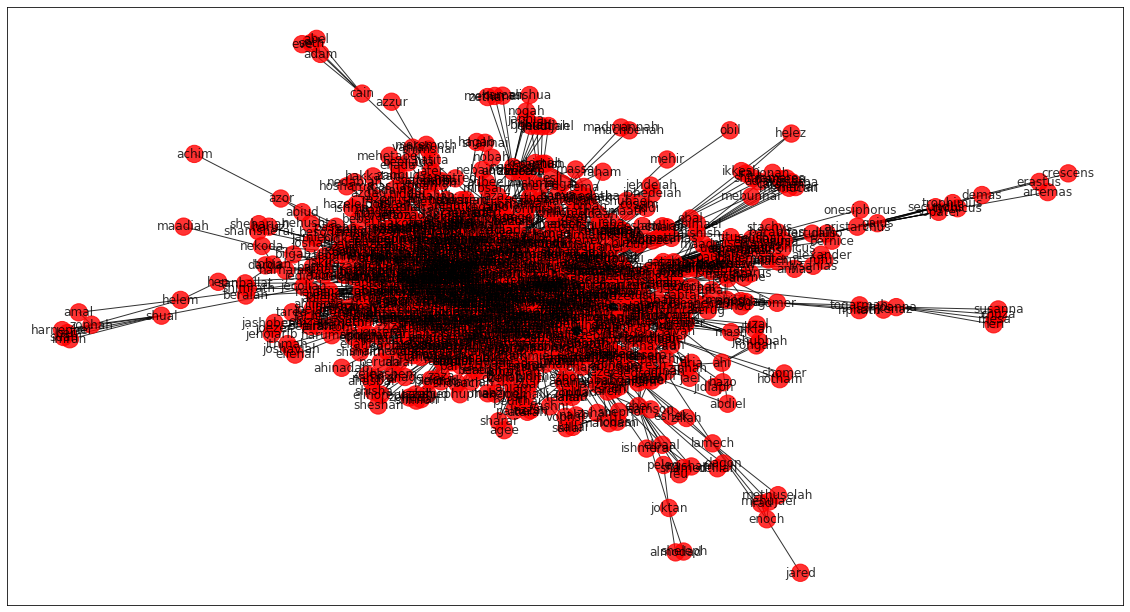

In [25]:
plt.figure(figsize=(20, 11))
nx.draw_networkx(Gc_noloc_cc, alpha = 0.8,font_size = 12, node_color = colors)
plt.draw()

# Visualizing top weights

- Filter the network by edges of weight 7 or greater
- Select the main connected component of this network

In [197]:
edges = pd.read_csv("data/data.csv",header = None)
edges.columns = ["from", "to", "weight"]
for i in range(0,11):
    print(len(edges[edges.weight > i ])) #We select the msot significant elements

min_weight = 7
edges_sig = edges[edges.weight>=7]

9131
2500
1177
710
486
344
250
197
162
135
124


In [198]:
Gct = nx.from_pandas_edgelist(edges_sig, *edges_sig.columns)

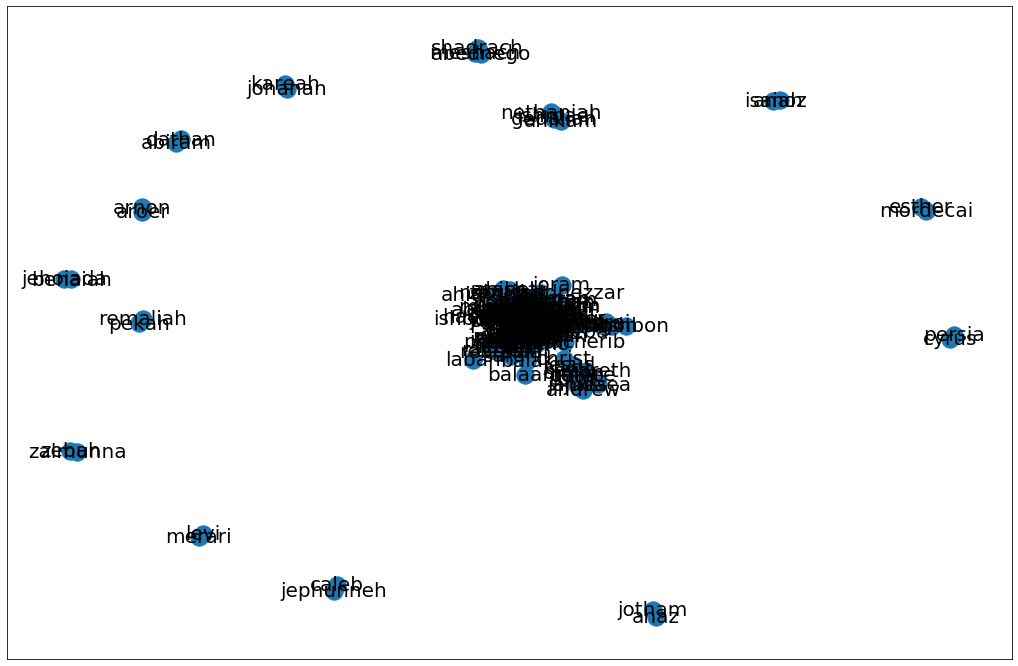

In [200]:
def get_weights(x,factor = 12):
    return ((x - x.min())*(factor-1)) / (x.max() - x.min())

w = get_weights(edges_sig['weight'],factor = 5)
nx.draw_networkx(Gct,with_labels=True,width = w,font_size = 20)
fig = plt.gcf()
fig.set_size_inches(18,12)

In [201]:
#Main connected component
Gct_main = max(connected_component_subgraphs(Gct), key=len)

In [210]:
#set location atribute
node_dict = dict(Gct_main.nodes(data = "location", default = False))

for l in locations:
    node_dict[l] = True
    
nx.set_node_attributes(Gct_main, node_dict, "location")

In [229]:
node_dict = dict(Gct_main.nodes(data = "location", default = False))
for l in locations:
    node_dict[l] = True
    

w = get_weights(np.array([d for n,d in Gct_main.degree()]), factor = 10)
colors = ["blue" if n[1]["location"] else "red" for n in Gct_main.nodes(data = True)]
nx.set_node_attributes(Gct_main, node_dict, "location")

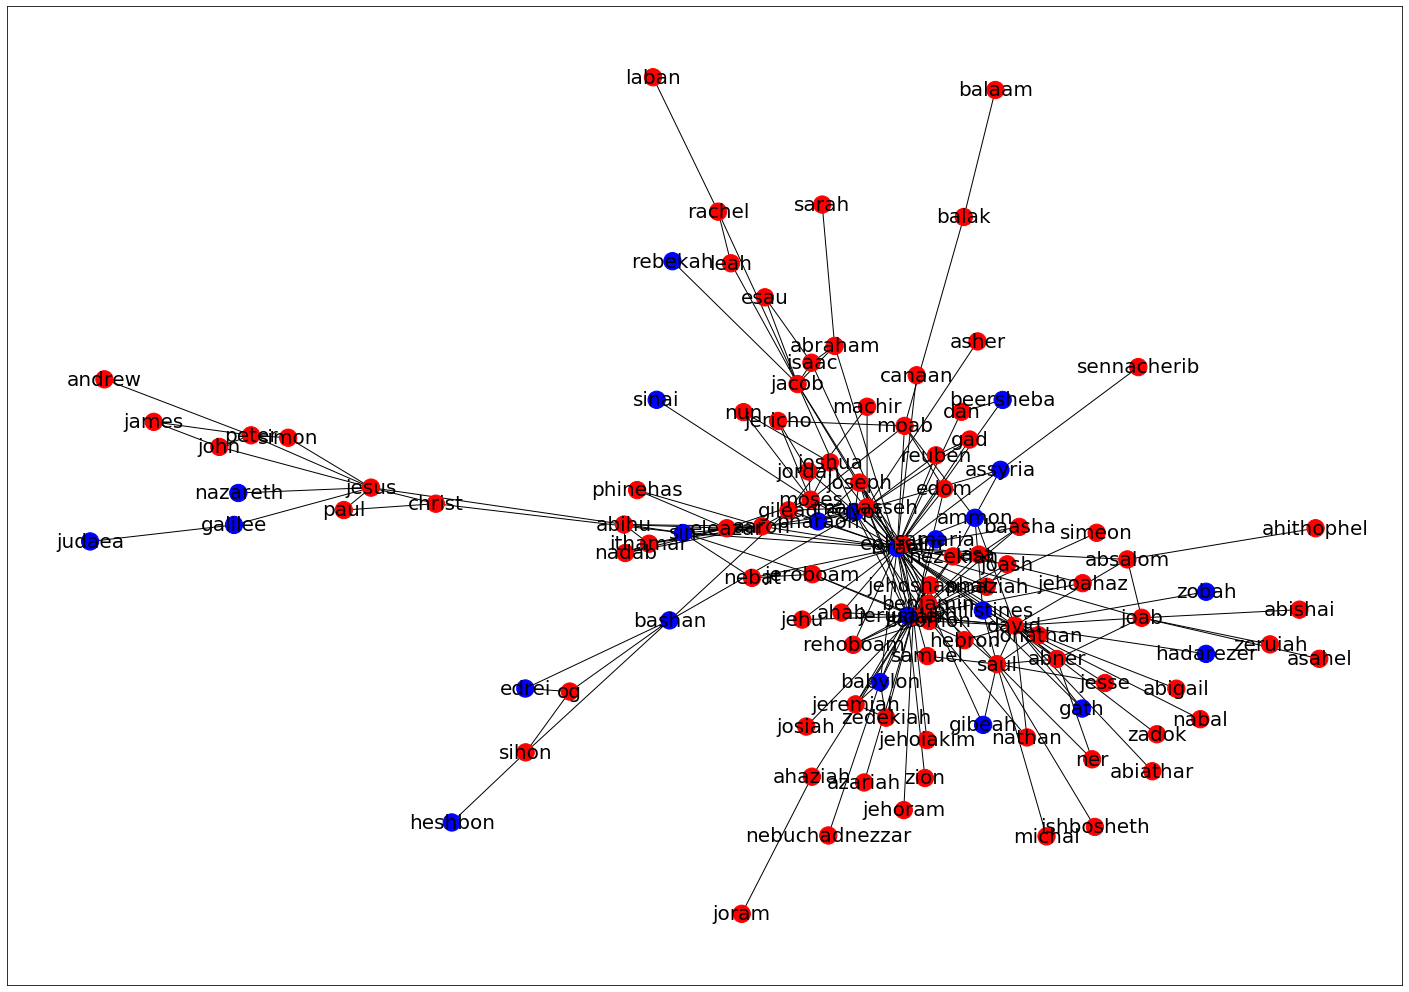

In [230]:
pos = nx.spring_layout(Gct_main)
nx.draw_networkx(Gct_main,pos = pos,with_labels=True,node_color = colors,font_size = 20)
fig = plt.gcf()

fig.set_size_inches(25,18)

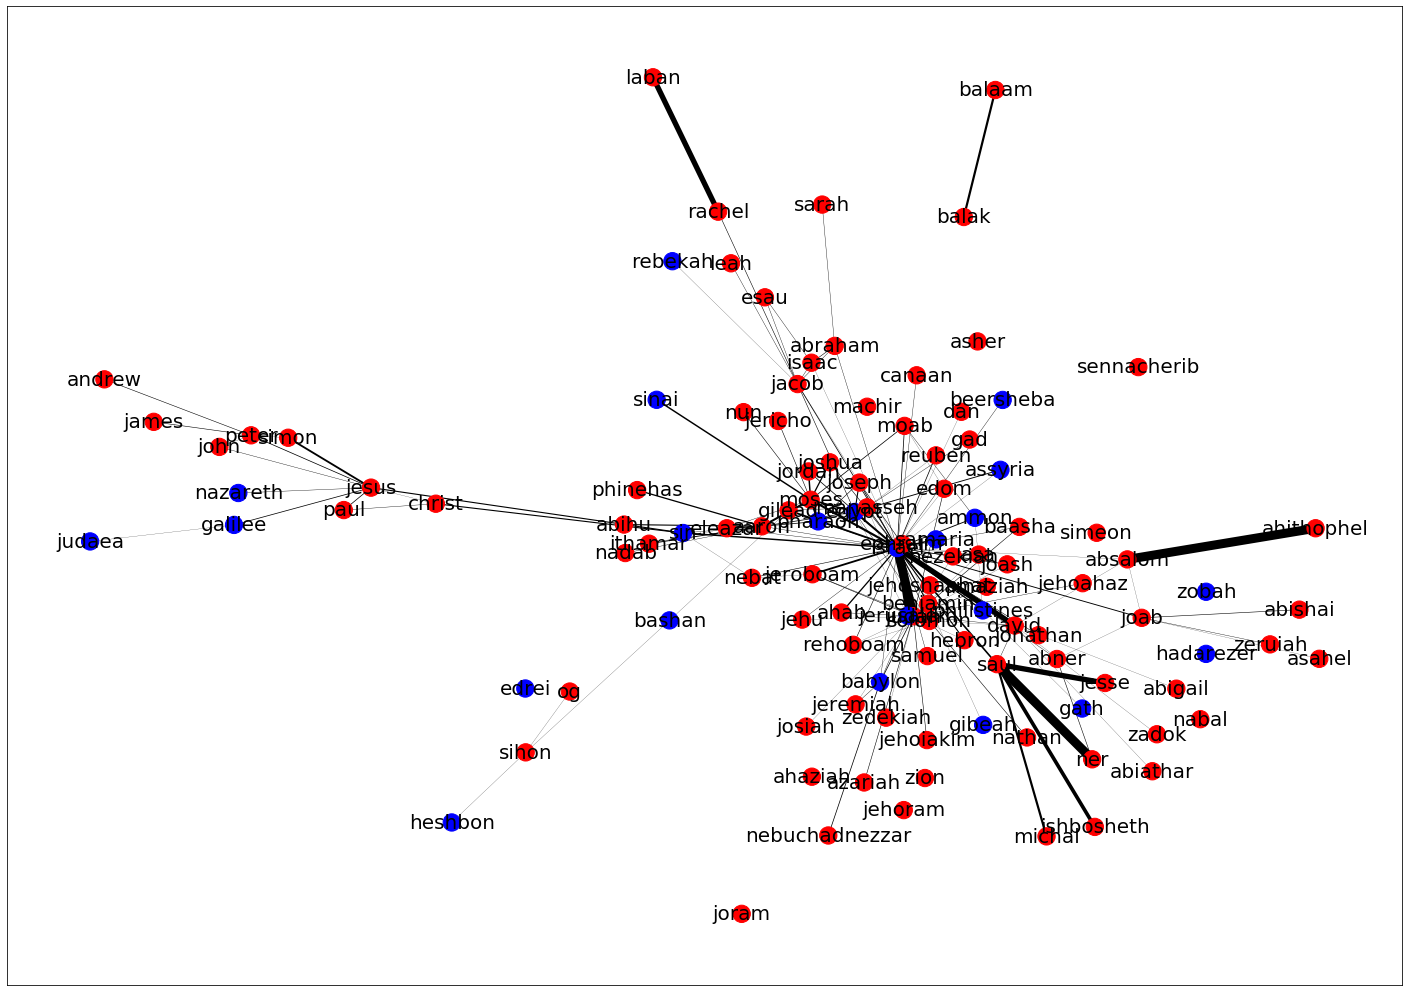

In [231]:
nx.draw_networkx(Gct_main,pos = pos, with_labels=True,width = w,node_color = colors,font_size = 20)
fig = plt.gcf()
fig.set_size_inches(25,18)

## Microscale

In [26]:
def Metrics(G):
    nodes = len(G) #number of nodes
    edges = len(G.edges)
    density = nx.density(G)
    cc = nx.number_connected_components(G)
    #d = nx.diameter(G) #larges distance between a pair of nodes in the network)
    #c = len(nx.center(G)) #number nodes in the center
    trans = nx.transitivity(G); #transitifivy (fraction of all possible triangles that exist in the network))
    assortativity = nx.degree_assortativity_coefficient(G)
    
    result = [nodes,edges,cc, density,assortativity]
    return(result)

In [28]:
networks = [G, Gc, Gcloc, Gc_noloc, Gc_noloc_cc]
index =  ["Entire Network", "Main Connected Component", "Main cc locations", "Main cc names", "Names main cc" ]
cols = ["Nodes", "Edges", "Connected Components", "density" ,"assortativity"]

In [29]:
df = pd.DataFrame()
for net in networks:
    df = df.append([Metrics(net)])
df.index = index
df.columns = cols

### Fundamental Metrics:

In [30]:
df

Nodes  Edges  Connected Components   density  \
Entire Network             1773   9131                    22  0.005813   
Main Connected Component   1707   9059                     1  0.006222   
Main cc locations           419   1076                     1  0.012287   
Main cc names              1077   5030                    20  0.008681   
Names main cc              1046   5008                     1  0.009163   

                          assortativity  
Entire Network                -0.048850  
Main Connected Component      -0.051855  
Main cc locations             -0.142402  
Main cc names                  0.003603  
Names main cc                  0.001196

- **Density** measures the fraction of existing edges out of all potentially possible edges.

- The most dense network is the network of locations

### Assortativity

In [31]:
df

Nodes  Edges  Connected Components   density  \
Entire Network             1773   9131                    22  0.005813   
Main Connected Component   1707   9059                     1  0.006222   
Main cc locations           419   1076                     1  0.012287   
Main cc names              1077   5030                    20  0.008681   
Names main cc              1046   5008                     1  0.009163   

                          assortativity  
Entire Network                -0.048850  
Main Connected Component      -0.051855  
Main cc locations             -0.142402  
Main cc names                  0.003603  
Names main cc                  0.001196

The network is generally disassortative, however filtering we can see that the locations of the network form a dissasortative network and the poeple's names form an assortative net.

- Assortative (high degree tend to be connected with high degree nodes)
- Dissasortative (high degree tend to be connected with low degree).

### Centrality

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. 

The **eigenvector centrality** for node i is 
$\mathbf{Ax} = \lambda \mathbf{x}$
where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $\lambda$.


In [233]:
cec = nx.centrality.eigenvector_centrality(Gc, weight = 'weight')

In [255]:
cec["israel"]

0.5451845959238458

In [261]:
df_cec = pd.DataFrame()
df_cec["node"] = list(cec.keys())
df_cec["egv_centrality"] = list(cec.values())
df_cec["egv_centrality"] = df_cec["egv_centrality"].round(4)
df_cec

node  egv_centrality
0        israel          0.5452
1         judah          0.4095
2     jerusalem          0.3028
3         david          0.3133
4          saul          0.1695
...         ...             ...
1702    zephath          0.0015
1703   berothai          0.0000
1704    nephish          0.0000
1705   philippi          0.0002
1706   hashupha          0.0000

[1707 rows x 2 columns]

#### Top 20 central nodes (eigenvector centrality):

In [266]:
df_cec.sort_values(by = "egv_centrality", ascending = False).head(20)

node  egv_centrality
0        israel          0.5452
1         judah          0.4095
3         david          0.3133
2     jerusalem          0.3028
5         moses          0.2107
4          saul          0.1695
9         egypt          0.1530
6         aaron          0.1351
18     benjamin          0.1179
21      solomon          0.1126
16  philistines          0.1086
13     jeroboam          0.1022
14      babylon          0.0916
26      ephraim          0.0897
15      pharaoh          0.0845
28     manasseh          0.0836
17          sin          0.0820
23       jordan          0.0785
12        jacob          0.0769
22      samaria          0.0752

In [267]:
cec["jesus"]

0.03133547448027778

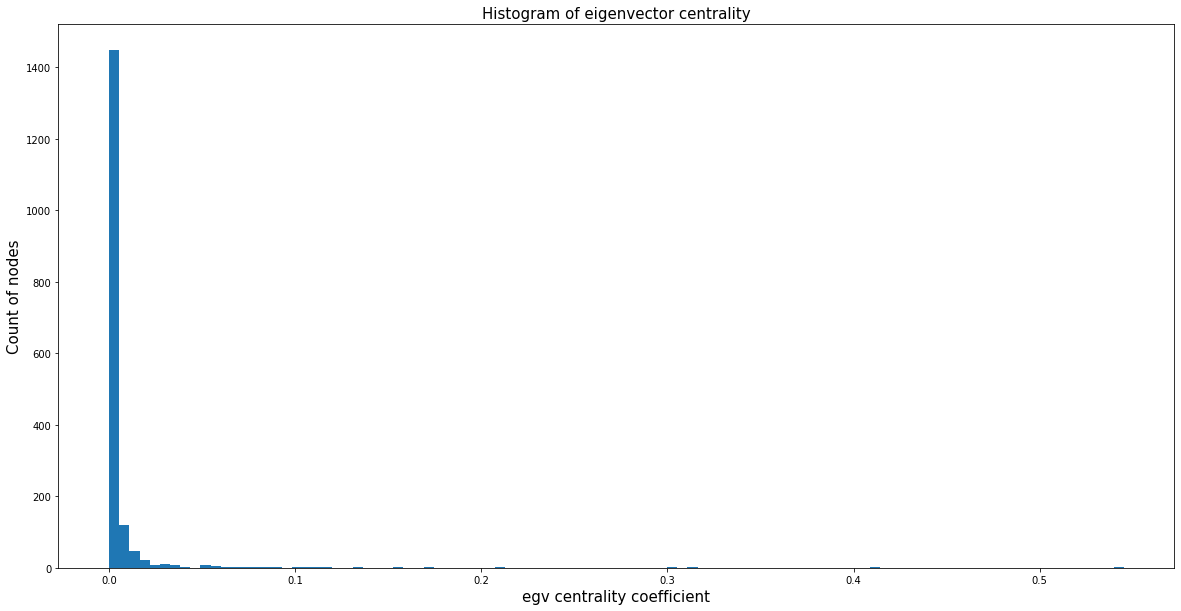

In [275]:
plt.figure(figsize=[20, 10])
hist = plt.hist( df_cec["egv_centrality"],bins = 100)
plt.title('Histogram of eigenvector centrality',fontsize=15)
plt.xlabel('egv centrality coefficient',fontsize=15)
plt.ylabel('Count of nodes',fontsize=15)

plt.show()

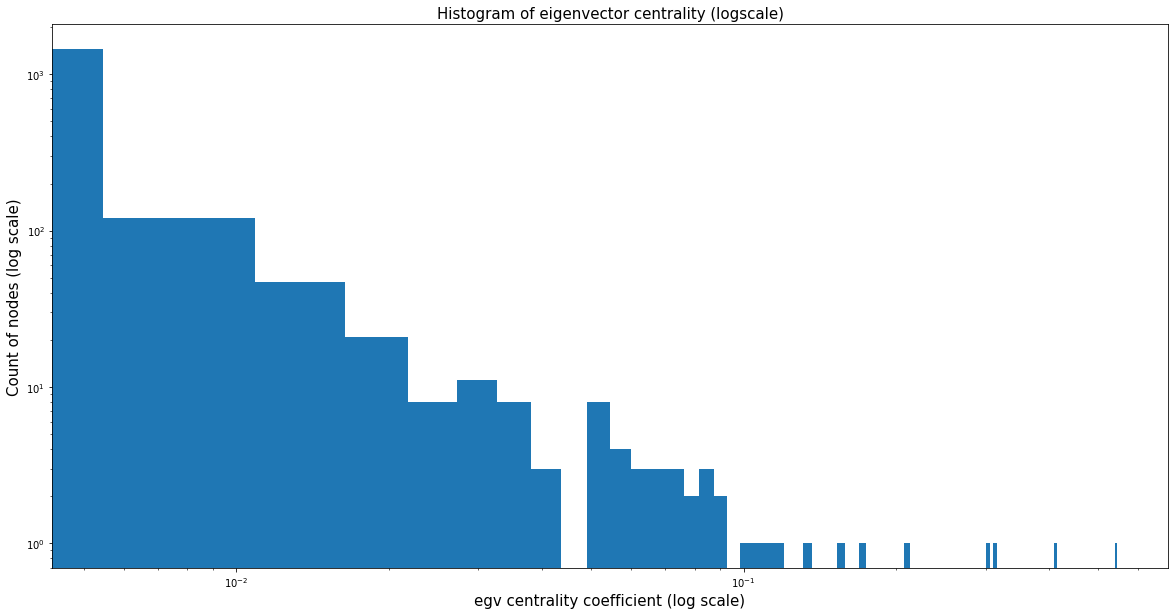

In [276]:
plt.figure(figsize=[20, 10])
hist = plt.hist( df_cec["egv_centrality"],bins = 100)
plt.title('Histogram of eigenvector centrality (logscale)',fontsize=15)
plt.xlabel('egv centrality coefficient (log scale)',fontsize=15)
plt.ylabel('Count of nodes (log scale)',fontsize=15)

plt.yscale('log')
plt.xscale('log')

plt.show()

### Degree Distribution

In [32]:
#Compute degree distribution
df_deg = pd.DataFrame()
df_deg["Node"]= list(G.nodes())
df_deg["degree"] = [G.degree(n) for n in G.nodes()]

#Merge the location category
df_deg = pd.merge(df_labs,df_deg, how='left',left_on = "Node", right_on = "Node")
df_deg["Location"] = df_deg["Location"].map({True: "location", False: "person"})
df_deg = df_deg.rename(columns = {"Location": "type"})

#
df_deg.sort_values( by = ["degree"], ascending = False, inplace = True)
df_deg.head(10)

Node      type  degree
0        israel  location     364
1         judah    person     254
3         david    person     221
2     jerusalem  location     202
9         egypt  location     122
18     benjamin    person     110
28     manasseh    person     108
26      ephraim    person     104
4          saul    person     103
16  philistines  location     100

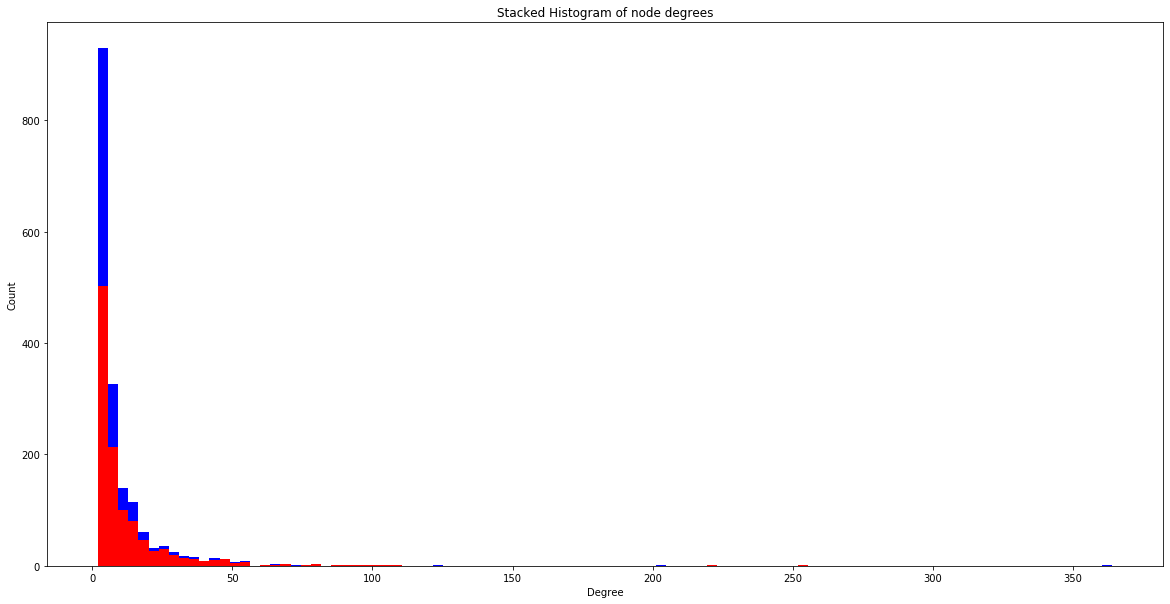

In [33]:
deg_loc = df_deg[df_deg["type"]=="location"]["degree"]
deg_nloc = df_deg[df_deg["type"]!="location"]["degree"]



plt.figure(figsize=[20, 10])
hist = plt.hist([deg_nloc,deg_loc],stacked=True, bins = 100, color = ["r","b"], label = ["1","2"])
plt.title('Stacked Histogram of node degrees')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### This looks like a Power-law distribution, is it?

Lets do the log-log histograms (if they follow a straight line they will fit a Power-law distribution)

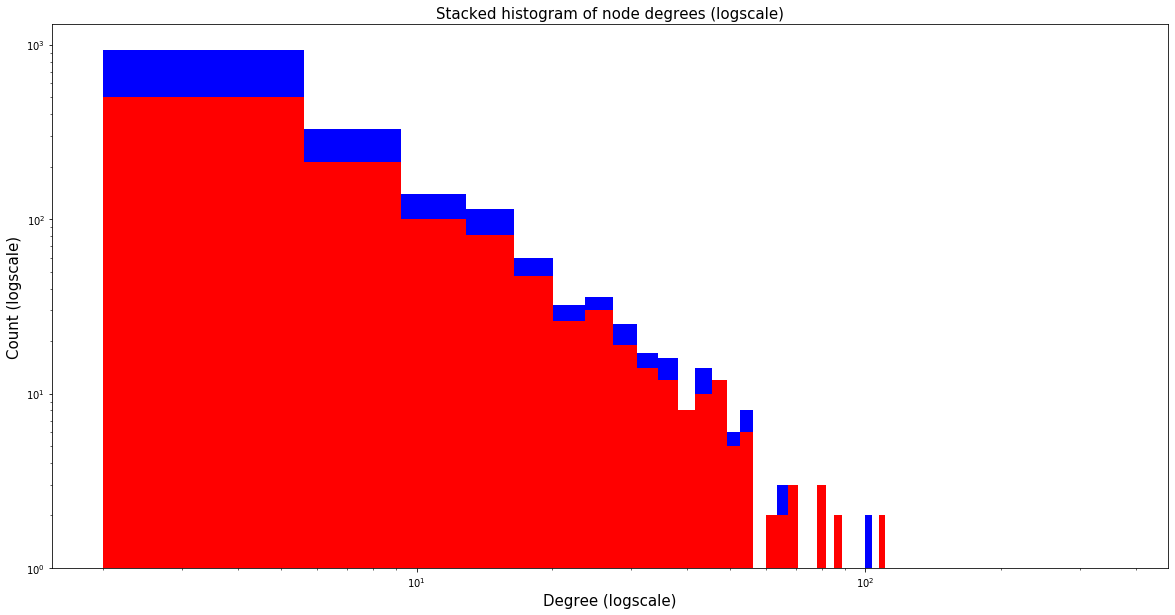

In [34]:
plt.figure(figsize=[20, 10])
hist = plt.hist([ deg_nloc,deg_loc],bins = 100,stacked=True, color = ["r","b"], label = ["1","2"])
plt.title('Stacked histogram of node degrees (logscale)',fontsize=15)
plt.xlabel('Degree (logscale)',fontsize=15)
plt.ylabel('Count (logscale)',fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.show()

A straight line could fit reasonably well this histogram, therefore it is reasonable to assume that the degree distribution follows a **power law**, i.e. our network is **scale-free**.

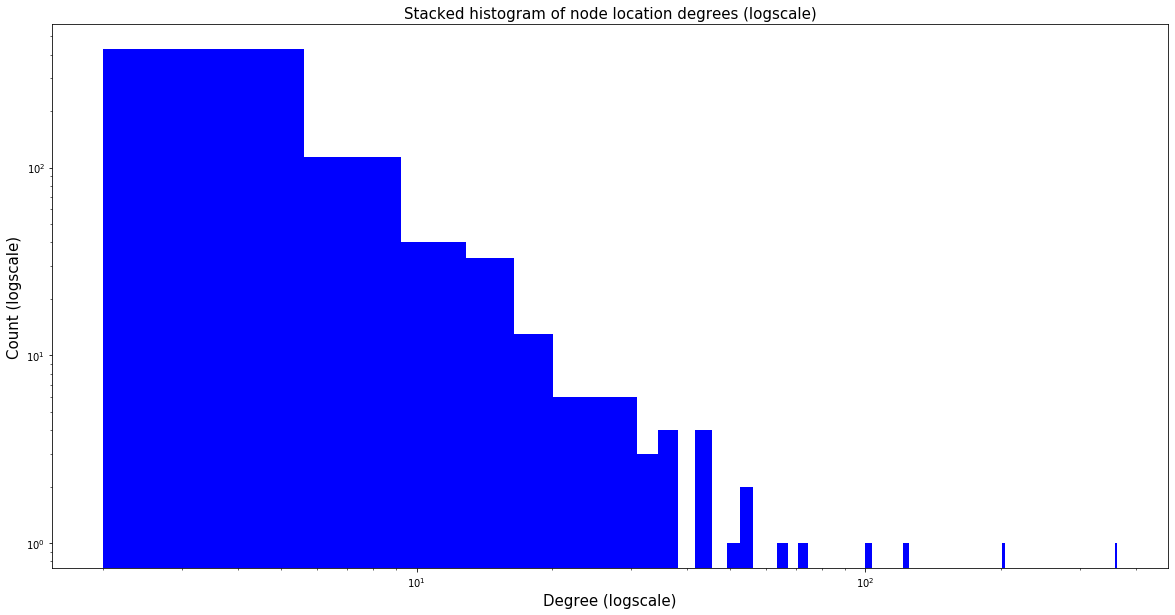

In [35]:
plt.figure(figsize=[20, 10])
hist = plt.hist([deg_loc],bins = 100,stacked=True, color = ["b"], label = ["1","2"])
plt.title('Stacked histogram of node location degrees (logscale)',fontsize = 15)
plt.xlabel('Degree (logscale)',fontsize = 15 )
plt.ylabel('Count (logscale)', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.show()

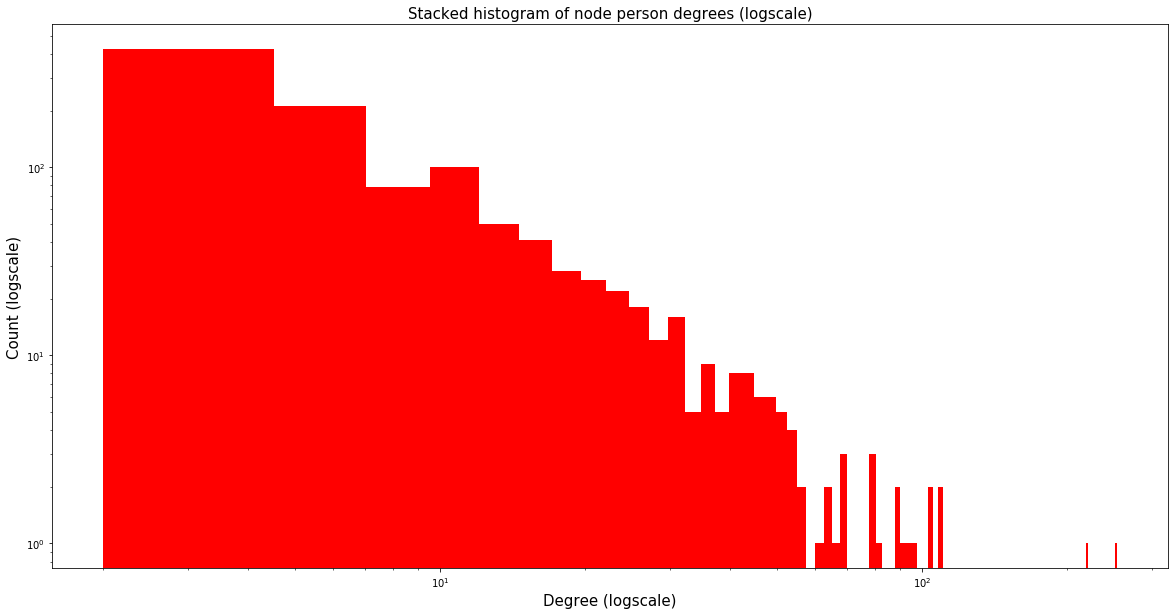

In [36]:
deg_loc = df_deg[df_deg["type"]=="location"]["degree"]
deg_nloc = df_deg[df_deg["type"]!="location"]["degree"]



plt.figure(figsize=[20, 10])
hist = plt.hist([deg_nloc],bins = 100,stacked=True, color = ["r"], label = ["1","2"])
plt.title('Stacked histogram of node person degrees (logscale)', fontsize = 15)
plt.xlabel('Degree (logscale)', fontsize = 15)
plt.ylabel('Count (logscale)', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.show()

Top 10 nodes by degree (number of edges conected to the node):

In [37]:
df_deg.head(10)

Node      type  degree
0        israel  location     364
1         judah    person     254
3         david    person     221
2     jerusalem  location     202
9         egypt  location     122
18     benjamin    person     110
28     manasseh    person     108
26      ephraim    person     104
4          saul    person     103
16  philistines  location     100

Top 10 **location** nodes by degree (number of edges conected to the node):

In [38]:
df_deg[df_deg["type"] == "location"].head(10)

Node      type  degree
0        israel  location     364
2     jerusalem  location     202
9         egypt  location     122
16  philistines  location     100
14      babylon  location      74
22      samaria  location      66
53      assyria  location      53
37        ammon  location      53
59      galilee  location      50
17          sin  location      44

Top 10 **person** nodes by degree (number of edges conected to the node):

In [39]:
df_deg[df_deg["type"] == "person"].head(20)

Node    type  degree
1        judah  person     254
3        david  person     221
18    benjamin  person     110
28    manasseh  person     108
26     ephraim  person     104
4         saul  person     103
5        moses  person      97
34      gilead  person      93
33      joseph  person      91
23      jordan  person      88
293   shemaiah  person      88
21     solomon  person      81
36        moab  person      80
291   maaseiah  person      79
103    azariah  person      78
254  zechariah  person      70
106     canaan  person      70
8        jesus  person      68
12       jacob  person      65
41      hebron  person      64

### Degree-rank plot

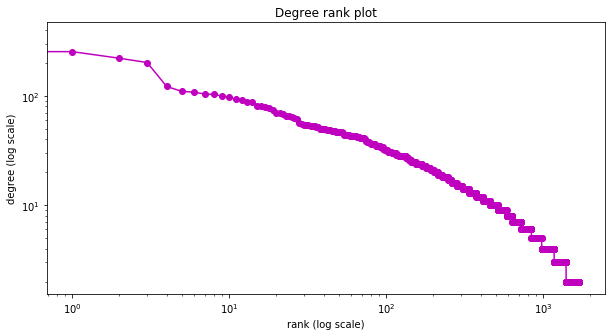

In [40]:
degree_sequence = sorted([d for n, d in Gc.degree()], reverse=True)
dmax = max(degree_sequence)

fig, ax = plt.subplots(figsize=(10, 5))
plt.loglog(degree_sequence, 'm-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree (log scale)")
plt.xlabel("rank (log scale)")
plt.show()

## Comparation with other models

### Comparation of degree distribution with other models:

In [105]:
def barabasi_albert_graph(N, m):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes())
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

def gnm_random_graph(N, M):
    G_2 = nx.Graph()
    G_2.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G_2.nodes(), 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G_2.add_edges_from(edges_to_add)
    
    return G_2

def watts_strogatz_graph(N, k, p):
    # 1. Create a ring of N nodes
    G_3 = nx.cycle_graph(N)

    # 2. Connect each node n to k nearest neighbors
    #    [n-(k//2), ... , n-1, n+1, ... , n+(k//2)]
    for n in G_3.nodes():
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N 
            G_3.add_edge(n, left)
            G_3.add_edge(n, right)
    
    # 3. Rewire edges with probability p
    for u, v in list(G_3.edges()):
        if random.random() < p:
            not_neighbors = set(G_3.nodes()) - set(G_3.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G_3.remove_edge(u, v)
            G_3.add_edge(u, w)

    return G_3

In [112]:
nodes = len(Gc.nodes())
edges = len(Gc.edges())

In [113]:
G_2 = gnm_random_graph(nodes, edges)
degrees_2 = dict(G_2.degree()).values()

degrees_3 = dict(G_3.degree()).values() 
G_4 = barabasi_albert_graph(nodes, 5) #the parameter 5 has been computed expermientaly to have a similar number of edges than the baseline
degrees_4 = dict(G_4.degree()).values() 


In [185]:
def plot_models():
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18,10))
    ax0, ax2, ax3 = axes.flatten()

    ax0.hist(list(degrees_2), 50)
    ax0.set_title('Erdös-Rényi (random graph)')
    ax0.set_ylim([0, 600])
    ax0.set_xlim([0,100])
    ax0.set_xlabel('Degree')
    ax0.set_ylabel('# nodes')


    ax2.hist(list(degrees_4), 300)
    ax2.set_title('Barabasi-Albert (preferential attachment)')
    ax2.set_ylim([0, 600])
    ax2.set_xlim([0,100])
    ax2.set_xlabel('Degree')
    ax2.set_ylabel('# nodes')

    ax3.hist(degree_sequence, 300)
    ax3.set_title('Bible Names Network')
    ax3.set_ylim([0, 600])
    ax3.set_xlim([0,100])
    ax3.set_xlabel('Degree')
    ax3.set_ylabel('# nodes')
    
    
    fig.tight_layout()
    plt.show()

    fig.tight_layout()
    plt.show()

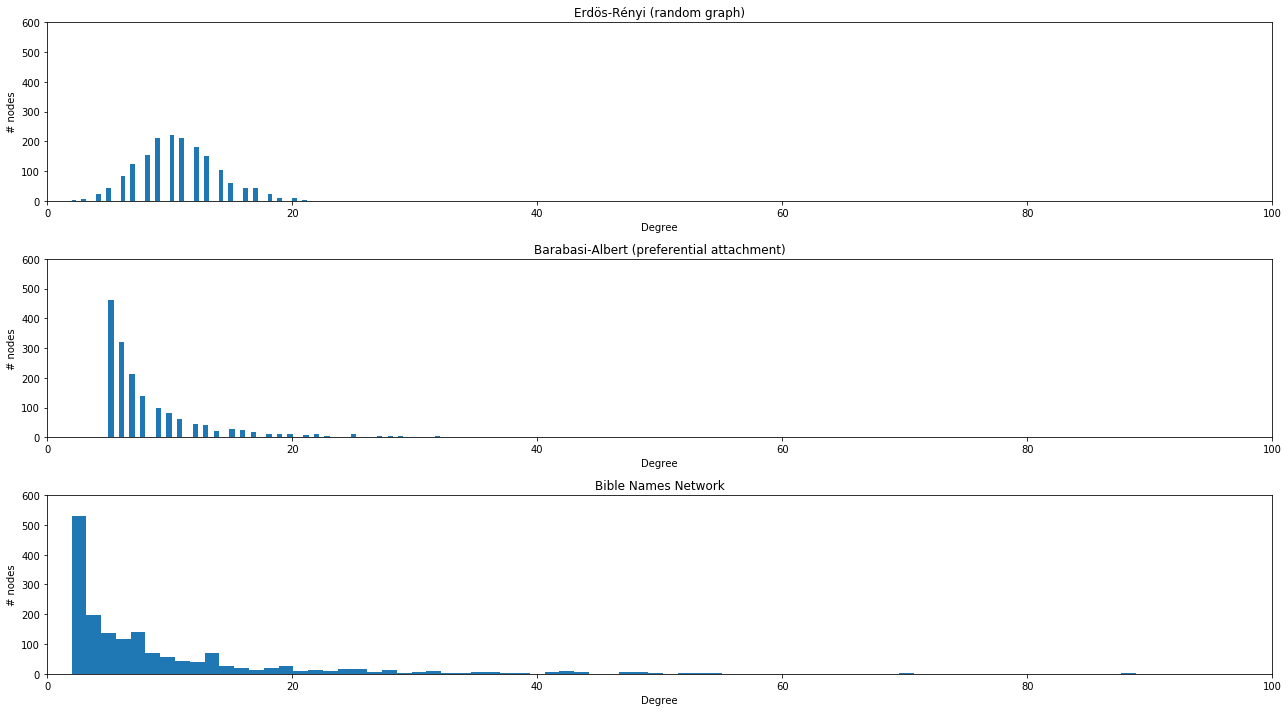

In [186]:
plot_models()

In [191]:
def plot_models_log():
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18,12))
    ax0, ax2, ax3 = axes.flatten()
    
    ax0.loglog(list(degrees_2))
    ax0.set_title('Erdös-Rényi (random graph)')
    ax0.set_ylim([0, 600])
    ax0.set_xlim([0,100])
    ax0.set_xlabel('Degree')
    ax0.set_ylabel('# nodes')
    


    ax2.loglog(list(degrees_4))
    ax2.set_title('Barabasi-Albert (preferential attachment)')
    ax2.set_ylim([0, 600])
    ax2.set_xlim([0,100])
    ax2.set_xlabel('Degree')

    ax3.loglog(degree_sequence)
    ax3.set_title('Bible Names Network')
#     ax3.set_ylim([0, 600])
#     ax3.set_xlim([0,100])
    ax3.set_xlabel('Degree')


    fig.tight_layout()
    plt.show()

    fig.tight_layout()
    plt.show()
    
    
#Im failing here, need help CHris!

C:\Users\xavie\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  
C:\Users\xavie\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':
C:\Users\xavie\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\xavie\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


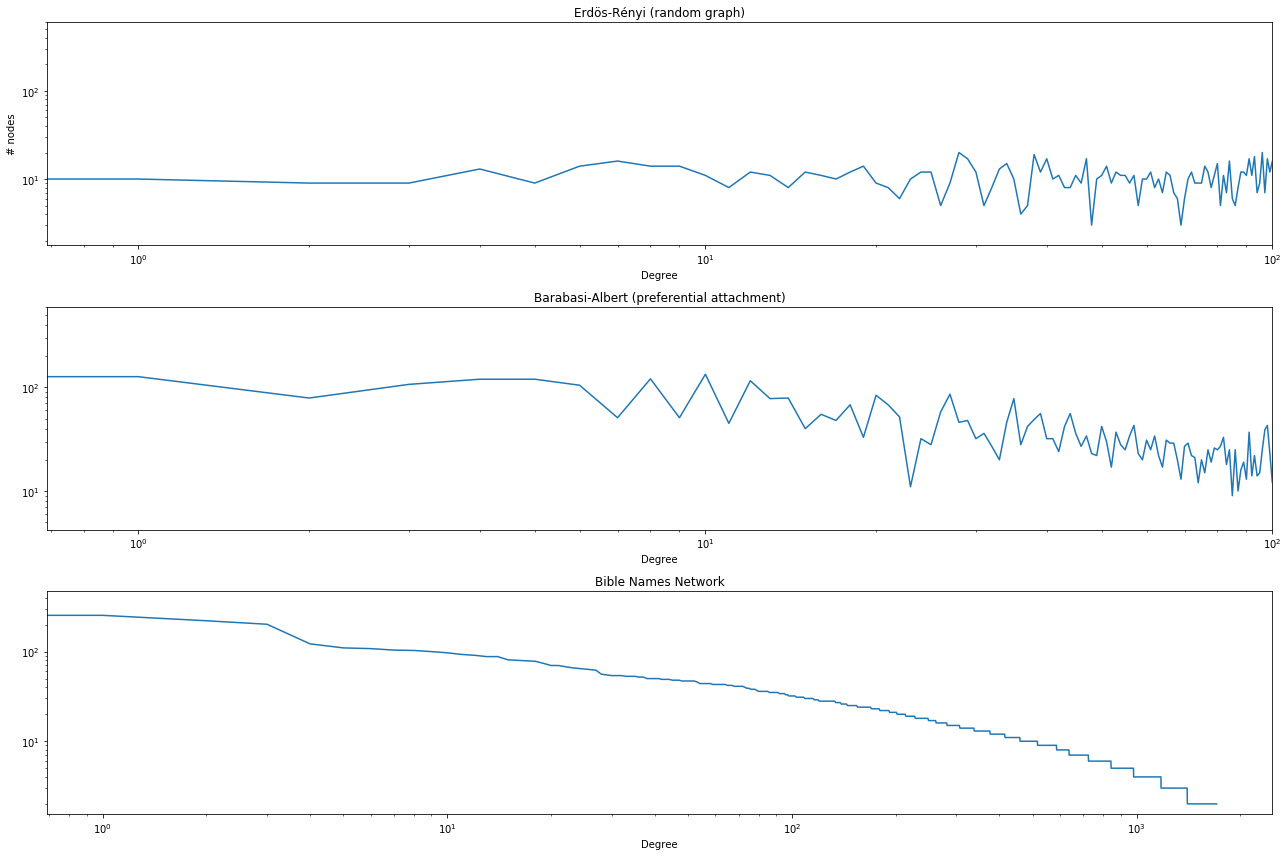

In [192]:
plot_models_log()

In [139]:
def Metrics_models(G):
    nodes = len(G) #number of nodes
    edges = len(G.edges)
    density = nx.density(G)
#     spl = nx.average_shortest_path_length(G)
    d = nx.diameter(G) #larges distance between a pair of nodes in the network)
    c = len(nx.center(G)) #number nodes in the center
#     r = len(nx.radius(G)) 
#     p = len(nx.periphery(G))
    trans = nx.transitivity(G); #transitifivy (fraction of all possible triangles that exist in the network))
    assortativity = nx.degree_assortativity_coefficient(G)
    
    result = [nodes,edges, density, d, c, trans, assortativity]
    return(result)

In [143]:
G_gnp_random_graph_metrics = Metrics_models(G_2)
G_pa_metrics = Metrics_models(G_4)
Gc_metrics = Metrics_models(Gc)

In [154]:
df = pd.DataFrame()
df = df.append([Gc_metrics])
df = df.append([G_gnp_random_graph_metrics])
df = df.append([G_pa_metrics])

df.columns =["nodes","edges","density","diameter", "center", "transitivy", "assortativity"]
df.index = ['Bible network (main connected component)','Erdos-Rényi (random graph)','Preferential Attachment']

In [155]:
df

nodes  edges   density  diameter  \
Bible network (main connected component)   1707   9059  0.006222         8   
Erdos-Rényi (random graph)                 1707   9059  0.006222         6   
Preferential Attachment                    1707   8520  0.005851         5   

                                          center  transitivy  assortativity  
Bible network (main connected component)     119    0.162496      -0.051855  
Erdos-Rényi (random graph)                   106    0.006034       0.013450  
Preferential Attachment                        7    0.020413      -0.048781

#### Conclusions on models:

- the preferential attachment seems to be closer to the original bible network than the Erdos-Renly random simulation.

- The assortativity, transitivity, and center of the preferential attachemant fit better the bible network.

Also the degree distribution makes more sense

- However the center of the preferential attachment is significantly different than the bible network.

## Macroscale

### Eccentricity

Eccentricity of a node $v$ is the maximum distance from $v$ to all other nodes in $G$

In [41]:
ec = nx.eccentricity(Gc)

In [42]:
df = pd.DataFrame()
df["node"] = ec.keys()
df["eccentricity"] = ec.values()

Text(0, 0.5, 'Count of nodes')

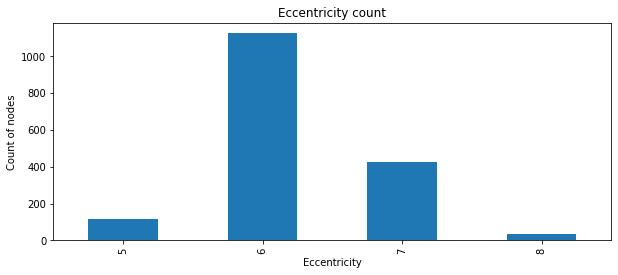

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = df["eccentricity"].value_counts().sort_index().plot(kind="bar", title = "Eccentricity count")
ax.set_xlabel("Eccentricity")
ax.set_ylabel("Count of nodes")

- **diameter**: larges distance between a pair of nodes in the network (maximum eccentricity)

In [44]:
d = nx.diameter(Gc)
d

8

- **radius**: minimum ecentricity

In [45]:
r = nx.radius(Gc) 
r

5

- **center**: set of all vertices of minimum eccentricity, i.e. the set of all vertices $u$ where the greatest distance $d(u,v)$ to other vertices is minimal.

In [46]:
c = nx.center(Gc)
len(c)

119

In [47]:
c[0:10]

['israel',
 'judah',
 'jerusalem',
 'david',
 'saul',
 'moses',
 'aaron',
 'egypt',
 'abraham',
 'isaac']

- **periphery**: Set of nodes with eccentricity equal to the diameter, i.e. $d(u,v)$ is maximal.

In [48]:
p = nx.periphery(Gc)
len(p)

35

### Shortest path length

The average shortest path length is the sum of path lengths d(u,v) between all pairs of nodes (assuming the length is zero if v is not reachable from v) normalized by n*(n-1) where n is the number of nodes in G.


In [49]:
spl = nx.average_shortest_path_length(Gc)
spl

3.3755393796044286

In [50]:
np.log(len(Gc.nodes))

7.442492722794441

Our shortest path length is less than half of the standard of a social network (facebook)

$$
L \sim \ln(N)
$$

In [51]:
spl/np.log(len(Gc.nodes))

0.4535495707326686

Even the shortest path length of the filtered by person names main connected component has a similar average shortest path length.

In [52]:
nx.average_shortest_path_length(Gc_noloc_cc)

3.482882157592835

### Average neighbour degree:


The average degree of a node is

$$
k_{nn,i} = \frac{1}{|N(i)|} \sum_{j\in N(i)}k_j
$$

where $N(i)$ are the neighbors of node $i$ and $k_j$ is the degree of node $j$ which belongs to $N(i)$. (The degree is the number of edges connected to each node).


In [53]:
df_avnd = pd.DataFrame.from_dict(nx.average_neighbor_degree(Gc),orient = "index", columns = ["average_neigh_degree"])
df_avnd

average_neigh_degree
israel                24.266484
judah                 29.263780
jerusalem             29.282178
david                 28.742081
saul                  35.572816
...                         ...
zephath              102.666667
berothai               8.500000
nephish                4.500000
philippi              44.500000
hashupha               7.000000

[1707 rows x 1 columns]

Text(0, 0.5, 'Count of nodes')

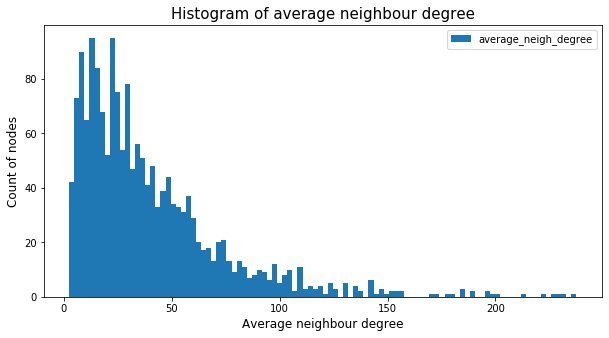

In [54]:
df_avnd.plot.hist(by="average_neigh_degree", bins = 100,figsize = (10,5))
plt.title('Histogram of average neighbour degree', fontsize = 15)
plt.xlabel('Average neighbour degree', fontsize = 12)
plt.ylabel('Count of nodes',fontsize = 12)

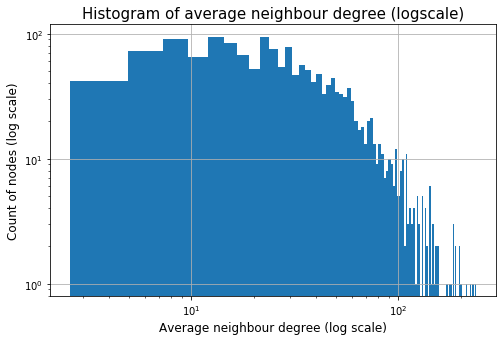

In [55]:
plt.figure(figsize=[8, 5])
hist = df_avnd["average_neigh_degree"].hist(bins=100)
plt.yscale('log')
plt.xscale('log')

plt.title('Histogram of average neighbour degree (logscale)', fontsize = 15)
plt.xlabel('Average neighbour degree (log scale)', fontsize = 12)
plt.ylabel('Count of nodes (log scale)',fontsize = 12)


plt.show()

#### Neighbours of Jesus

We all may be sons of Jesus...

But not everyone is a neighbour of Jesus:

In [56]:
jesus = Gc["jesus"]
print(len(jesus))
print(jesus)

68
{'christ': {'weight': 52}, 'peter': {'weight': 20}, 'paul': {'weight': 15}, 'galilee': {'weight': 14}, 'simon': {'weight': 11}, 'john': {'weight': 9}, 'sin': {'weight': 9}, 'nazareth': {'weight': 8}, 'philip': {'weight': 5}, 'moses': {'weight': 5}, 'israel': {'weight': 5}, 'pilate': {'weight': 5}, 'james': {'weight': 5}, 'david': {'weight': 5}, 'judaea': {'weight': 4}, 'timotheus': {'weight': 4}, 'joseph': {'weight': 4}, 'mary': {'weight': 4}, 'elias': {'weight': 3}, 'silvanus': {'weight': 3}, 'cana': {'weight': 3}, 'abraham': {'weight': 3}, 'jordan': {'weight': 3}, 'andrew': {'weight': 2}, 'martha': {'weight': 2}, 'bethany': {'weight': 2}, 'pontius': {'weight': 2}, 'jerusalem': {'weight': 2}, 'herod': {'weight': 2}, 'antichrist': {'weight': 2}, 'achaia': {'weight': 1}, 'asia': {'weight': 1}, 'ephesus': {'weight': 1}, 'philemon': {'weight': 1}, 'judas': {'weight': 1}, 'tiberias': {'weight': 1}, 'titus': {'weight': 1}, 'sosthenes': {'weight': 1}, 'pontus': {'weight': 1}, 'zebedee': {

Jeruslem has by far more neighbours than Jesus:

In [57]:
egypt = Gc["israel"]
print(len(egypt))
print(egypt)

364
{'judah': {'weight': 100}, 'david': {'weight': 73}, 'moses': {'weight': 67}, 'jerusalem': {'weight': 54}, 'egypt': {'weight': 40}, 'jeroboam': {'weight': 33}, 'saul': {'weight': 31}, 'aaron': {'weight': 31}, 'philistines': {'weight': 27}, 'sin': {'weight': 26}, 'joshua': {'weight': 25}, 'solomon': {'weight': 22}, 'samaria': {'weight': 21}, 'jordan': {'weight': 21}, 'benjamin': {'weight': 21}, 'jacob': {'weight': 19}, 'moab': {'weight': 17}, 'ammon': {'weight': 17}, 'ephraim': {'weight': 17}, 'pharaoh': {'weight': 16}, 'eleazar': {'weight': 16}, 'ahab': {'weight': 16}, 'assyria': {'weight': 15}, 'samuel': {'weight': 15}, 'jehoshaphat': {'weight': 15}, 'reuben': {'weight': 14}, 'manasseh': {'weight': 14}, 'joash': {'weight': 14}, 'gilead': {'weight': 13}, 'asa': {'weight': 12}, 'amaziah': {'weight': 12}, 'joseph': {'weight': 12}, 'dan': {'weight': 11}, 'hebron': {'weight': 11}, 'nebat': {'weight': 10}, 'babylon': {'weight': 9}, 'joab': {'weight': 9}, 'rehoboam': {'weight': 9}, 'baash

### Clustering Coefficient (not considering weights)

Clustering coefficient: measure of the prevelance of triangles in an egocentric network. 

The clustering coefficient is the fraction of possible triangles that contain the given node and exist. 

If the clustering coefficient of a node is 1, the **node participates in every possible triangle** involving any pair of its neighours; the egocentric network of such a node is a complete graph. If the clustering coefficient of a node is 0, no two nodes in the neigbourhood are connected; the egocentric network of such a node iss a ster. Think of clustering coefficient as a measure of "stardom"

In [58]:
cc = dict(nx.clustering(nx.Graph(Gc))); cc

{'israel': 0.039672448763357855,
 'judah': 0.059630886060191096,
 'jerusalem': 0.06068666568149352,
 'david': 0.06001645413410119,
 'saul': 0.10755758614125262,
 'moses': 0.13058419243986255,
 'aaron': 0.1795946890286513,
 'christ': 0.1292517006802721,
 'jesus': 0.12598770851624233,
 'egypt': 0.10486383958813168,
 'abraham': 0.18588399720475193,
 'isaac': 0.2803030303030303,
 'jacob': 0.17259615384615384,
 'jeroboam': 0.22363945578231292,
 'babylon': 0.12773047019622363,
 'pharaoh': 0.21176470588235294,
 'philistines': 0.0892929292929293,
 'sin': 0.22832980972515857,
 'benjamin': 0.11326105087572977,
 'jonathan': 0.11316763617133792,
 'joshua': 0.1907993966817496,
 'solomon': 0.11882716049382716,
 'samaria': 0.17016317016317017,
 'jordan': 0.1538662486938349,
 'joab': 0.1961038961038961,
 'peter': 0.2721774193548387,
 'ephraim': 0.11183719193427931,
 'abner': 0.3439153439153439,
 'manasseh': 0.11163032191069575,
 'nebat': 0.45,
 'eleazar': 0.1988388969521045,
 'jehoshaphat': 0.25320056

In [59]:
keys = cc.keys()
values = cc.values()

df_cc = pd.DataFrame()
df_cc["node"] = keys
df_cc["clustering_coef"] = values
df_cc.sort_values(by=["clustering_coef"], ascending = False, inplace = True)

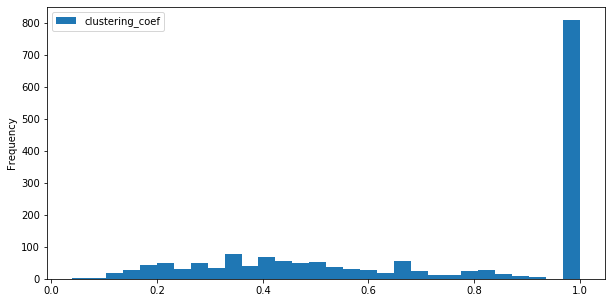

In [60]:
df_cc.plot.hist(by="clustering_coef", bins = 30,figsize = (10,5))

### Clusteirng Coefficient distribution considering weights

For weighted graphs, the clustering is defined as the geometric average of the subgraph edge weights

In [61]:
cc = dict(nx.clustering(nx.Graph(Gc), weight = "weight")); cc

{'israel': 0.0019510921222952934,
 'judah': 0.0025133353562331487,
 'jerusalem': 0.0023364940151250828,
 'david': 0.0023523357321432914,
 'saul': 0.004087938281737927,
 'moses': 0.005802402916740815,
 'aaron': 0.008277990146351112,
 'christ': 0.004389397674138815,
 'jesus': 0.004521435295866782,
 'egypt': 0.0035611895284391915,
 'abraham': 0.005452249480721998,
 'isaac': 0.010758655248783656,
 'jacob': 0.00677121252717882,
 'jeroboam': 0.008272292067226277,
 'babylon': 0.004272188548931528,
 'pharaoh': 0.010246406512196828,
 'philistines': 0.0027201886345192177,
 'sin': 0.00860089349224517,
 'benjamin': 0.0033292805351649597,
 'jonathan': 0.0030817721541625386,
 'joshua': 0.006327452713714051,
 'solomon': 0.004364283618919027,
 'samaria': 0.004904038173630937,
 'jordan': 0.004477722405782213,
 'joab': 0.006896767818008311,
 'peter': 0.008886276980794538,
 'ephraim': 0.003195797442986342,
 'abner': 0.01340092513587847,
 'manasseh': 0.003624222347160857,
 'nebat': 0.019708555373046253,
 

In [62]:
keys = cc.keys()
values = cc.values()

df_cc = pd.DataFrame()
df_cc["node"] = keys
df_cc["clustering_coef"] = values
df_cc.sort_values(by=["clustering_coef"], ascending = False, inplace = True)

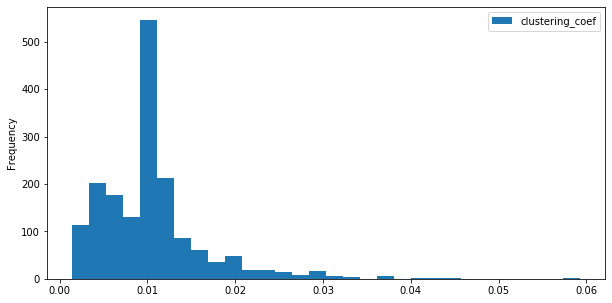

In [63]:
df_cc.plot.hist(by="clustering_coef", bins = 30,figsize = (10,5))

### Transitivity 

(clustering coefficient of the whole network, i.e. fraction of all possible triangles that exist in the network)

In [64]:
trans = nx.transitivity(Gc); trans

0.16249612832760055

### Number of triangles 

In [65]:
df_tri = pd.DataFrame.from_dict(nx.triangles(Gc),orient = "index", columns = ["triangles"])
df_tri

triangles
israel          2621
judah           1916
jerusalem       1232
david           1459
saul             565
...              ...
zephath            3
berothai           1
nephish            1
philippi           6
hashupha           1

[1707 rows x 1 columns]

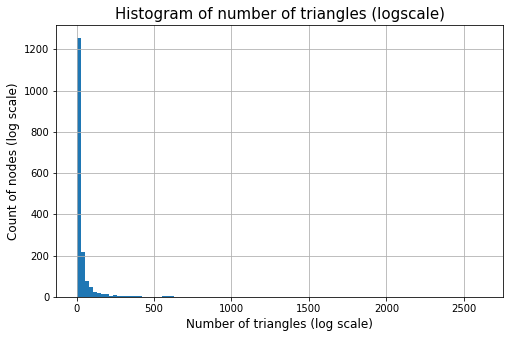

In [66]:
plt.figure(figsize=[8, 5])
hist = df_tri["triangles"].hist(bins=100)

plt.title('Histogram of number of triangles (logscale)', fontsize = 15)
plt.xlabel('Number of triangles (log scale)', fontsize = 12)
plt.ylabel('Count of nodes (log scale)',fontsize = 12)


plt.show()

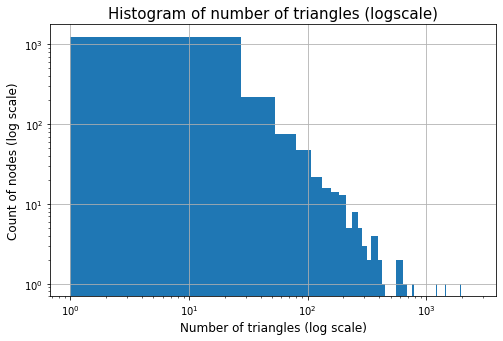

In [67]:
plt.figure(figsize=[8, 5])
hist = df_tri["triangles"].hist(bins=100)
plt.yscale('log')
plt.xscale('log')

plt.title('Histogram of number of triangles (logscale)', fontsize = 15)
plt.xlabel('Number of triangles (log scale)', fontsize = 12)
plt.ylabel('Count of nodes (log scale)',fontsize = 12)


plt.show()

## Good vs Evil

In [61]:
df_evil =  pd.read_excel("data/labels_fady_goodanevil.xlsx", sheet_name="top_nodes",usecols = 'A:B')
evils = list(df_evil[df_evil["Good / Evil"] == 'Evil']['Unique values'])
node_evil = dict(Gct.nodes(data = "Good / Evil", default = True))

for l in node_evil:
    if l in evils:
        node_evil[l] = 'Evil'
    else:
        node_evil[l] = 'Good'
node_evil

nx.set_node_attributes(Gct, node_evil, "Good / Evil")

In [62]:
df_labs =  pd.read_excel("data/labels_fady_goodanevil.xlsx", sheet_name="Sheet2",usecols = 'A:B')
locations = df_labs[df_labs["Location"] == True]["Node"]
node_dict = dict(G.nodes(data = "location", default = False))

for l in locations:
    node_dict[l] = True
    
node_dict

nx.set_node_attributes(Gct, node_dict, "location")




In [63]:
Gct.nodes(data=True)

NodeDataView({'israel': {'location': True, 'Good / Evil': 'Good'}, 'judah': {'location': False, 'Good / Evil': 'Evil'}, 'jerusalem': {'location': True, 'Good / Evil': 'Good'}, 'david': {'location': False, 'Good / Evil': 'Good'}, 'saul': {'location': False, 'Good / Evil': 'Good'}, 'moses': {'location': False, 'Good / Evil': 'Good'}, 'aaron': {'location': False, 'Good / Evil': 'Good'}, 'christ': {'location': False, 'Good / Evil': 'Good'}, 'jesus': {'location': False, 'Good / Evil': 'Good'}, 'egypt': {'location': True, 'Good / Evil': 'Good'}, 'abraham': {'location': False, 'Good / Evil': 'Good'}, 'isaac': {'location': False, 'Good / Evil': 'Good'}, 'jacob': {'location': False, 'Good / Evil': 'Good'}, 'jeroboam': {'location': False, 'Good / Evil': 'Good'}, 'babylon': {'location': True, 'Good / Evil': 'Good'}, 'pharaoh': {'location': True, 'Good / Evil': 'Evil'}, 'philistines': {'location': True, 'Good / Evil': 'Evil'}, 'sin': {'location': True, 'Good / Evil': 'Evil'}, 'benjamin': {'locatio

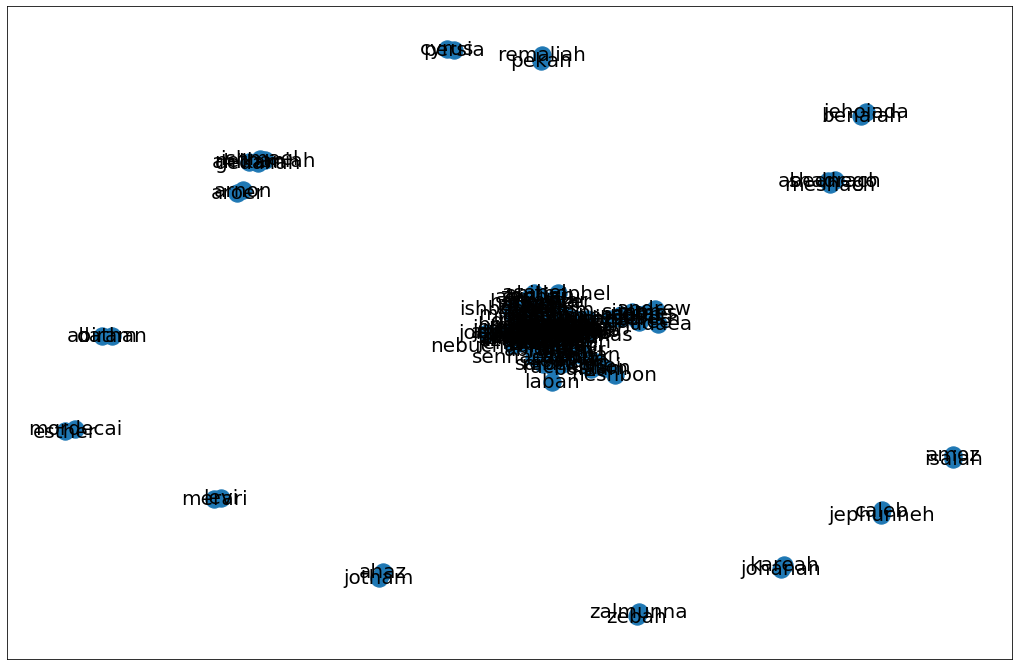

In [64]:
w = get_weights(edges_sig['weight'],factor = 5)
nx.draw_networkx(Gct,with_labels=True,width = w,font_size = 20)
fig = plt.gcf()
fig.set_size_inches(18,12)

In [92]:
#Main connected component
Gct_main = max(connected_component_subgraphs(Gct), key=len)

In [93]:
def get_weights(x,factor = 12,start = 1):
    return start + ((x - x.min())*(factor-start)) / (x.max() - x.min())

In [101]:
def plot_loc_good_evil():
    w = get_weights(np.array([d for n,d in Gct_main.degree()]), factor = 10,start = 1)
    colors = ["blue" if n[1]["location"] else "green" if n[1]['Good / Evil'] == 'Good' else "red" for n in Gct_main.nodes(data=True)]
    pos = nx.spring_layout(Gct_main)
    nx.draw_networkx(Gct_main,pos = pos,with_labels=True,width = w,node_color = colors,font_size = 20)
    fig = plt.gcf()
    fig.set_size_inches(25,18)

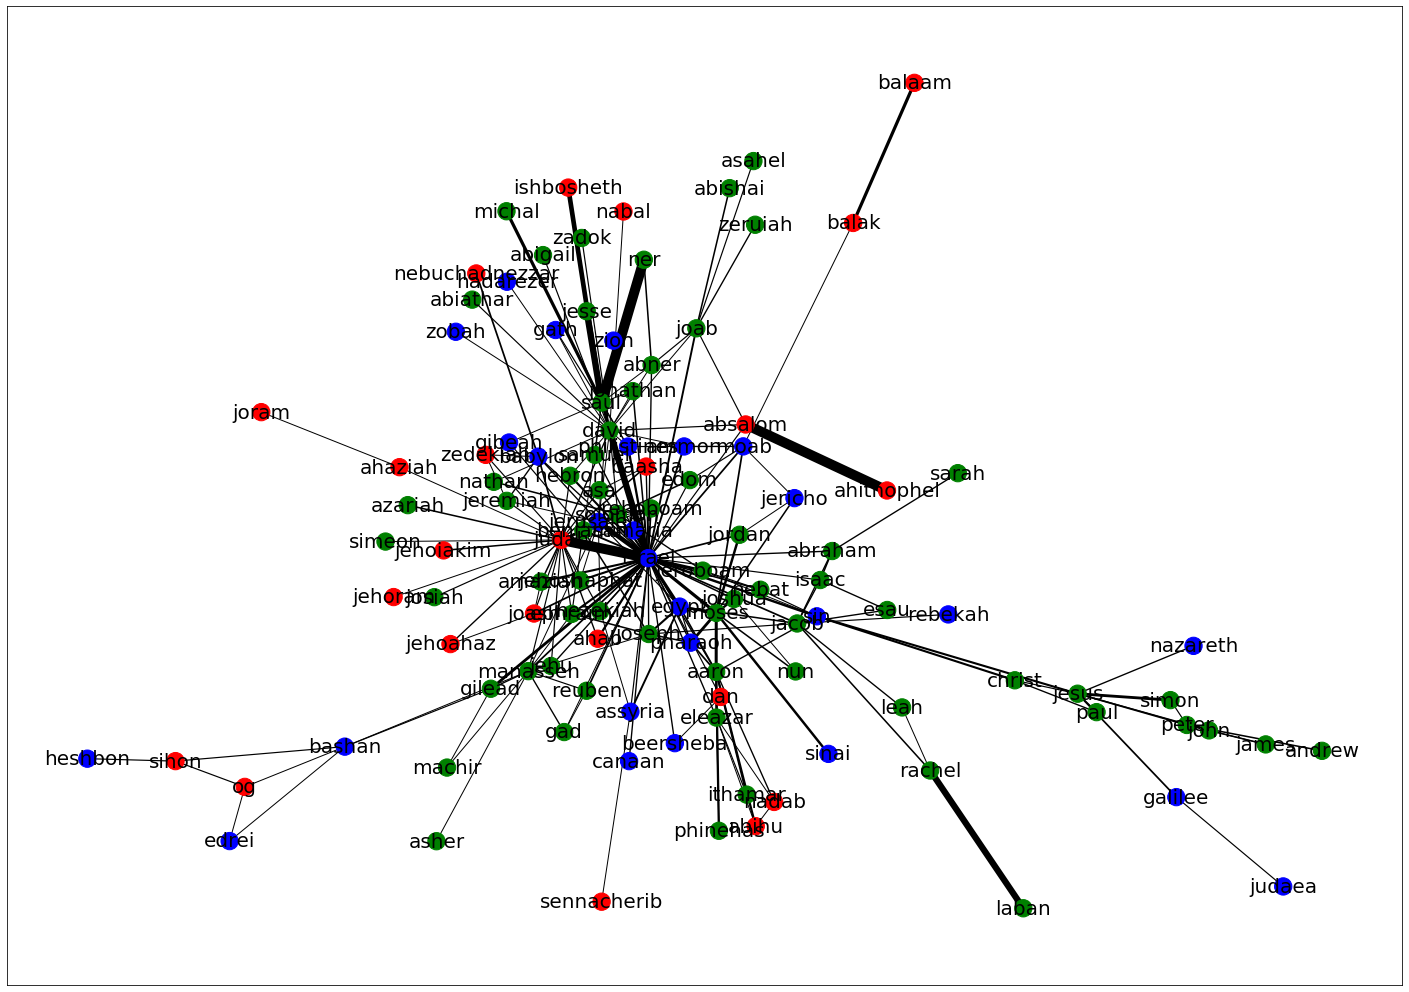

In [102]:
plot_loc_good_evil()

In [95]:
good_evil = list(df_evil[(df_evil["Good / Evil"] == 'Evil') | (df_evil["Good / Evil"] == 'Good')]['Unique values'])

In [98]:
def plot_good_evil():
    
    Gct_main_evil = max(connected_component_subgraphs(Gct_main.subgraph(good_evil)), key=len)

    w = get_weights(np.array([d for n,d in Gct_main_evil.degree()]), factor = 10,start = 1)
    colors = ["green" if n[1]['Good / Evil'] == 'Good' else "red" for n in Gct_main_evil.nodes(data=True)]

    nx.draw_networkx(Gct_main_evil,pos = pos,with_labels=True,width = w,node_color = colors,font_size = 20)
    fig = plt.gcf()
    fig.set_size_inches(25,18)

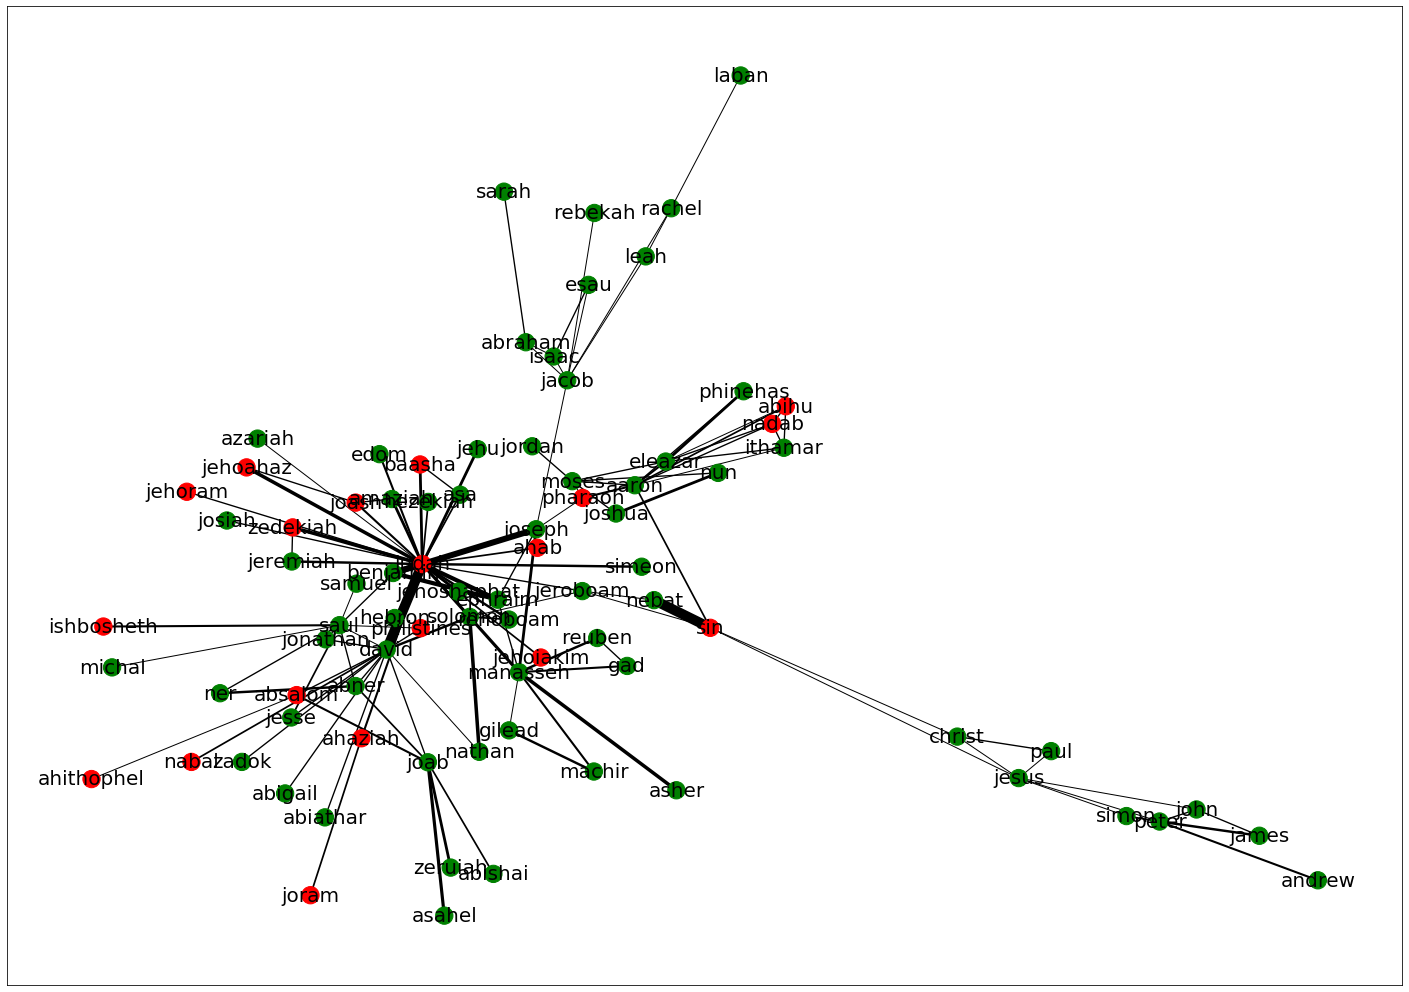

In [100]:
plot_good_evil()